# Forest Cover Type Prediction
### Authors: Maura Cullin, Mike Gruzynski
#### w207 Final project section 3

Introduction: We choose to do the kaggle competition: Forest Cover Type Prediction (https://www.kaggle.com/c/forest-cover-type-prediction). The data comes from US Forest Service (USFS) Region 2 Resource Information System data and the Independent variables were then derived from data obtained from the US Geological Survey and USFS.

This study area includes four wilderness areas located in the Roosevelt National Forest, which is located in northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes (or natural setting) rather than forest management practices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import sys
import os.path
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import average_precision_score

from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


# For producing decision tree diagrams.
from IPython.core.display import Image, display
from sklearn.externals.six import StringIO

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 1000)

%matplotlib inline

/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load the raw dataset
file_path = os.getcwd() + "/final_project"
file_path = os.getcwd() + "/data"
train_df = pd.read_csv(file_path + '/train.csv')
target = train_df['Cover_Type']
train_df = train_df.drop('Cover_Type', 1)
train_df = train_df.drop('Soil_Type7', 1)
train_df = train_df.drop('Soil_Type15', 1)
train_df = train_df.drop('Id',1)

# print train_df.head()
test_df = pd.read_csv(file_path + '/test.csv')

predictors = train_df.columns
l = len(target)

There is 15120 rows in the dataframe, with no missing data. The data is clean and the only filter that will be performed on the dataset is on "Soil_Type7","Soil_Type15" because there is only values of 0 for all rows in the training data. We will remove the two columns from the data

In [3]:
# setting up variable types
continuous = [
            'Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
            ]

# remove "Soil_Type7","Soil_Type15" because their data was only one value (data cannot be seperable and irrelevantc)
binary = [
        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
        'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
        'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
        'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
        'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
        'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
        'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
        'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
        'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
        'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
        'Soil_Type40'
        ]

predictors = continuous + binary

# objective variable is a category
target_str = 'Cover_Type'

In [85]:
predictors = train_df.columns

# Prepare Test Set 
test_df = test_df.drop('Soil_Type7', 1)
test_df = test_df.drop('Soil_Type15', 1)

# EDA on the dataset

In [5]:
# Class Distribution
target_names_list = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
                "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
target_names_dict = {1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine", 
                4:"Cottonwood/Willow",5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}

counts = target.value_counts(sort=False)
total = sum(counts)
print "Class Distribution in Target Var: "
print "\tClass                    |  Number of Examples"
for c in np.unique(target):
    print "\t%i, %-17s     |   %i (%0.2f%%)" %(c, target_names_dict[c] ,counts[c], (counts[c]/float(total))*100)


Class Distribution in Target Var: 
	Class                    |  Number of Examples
	1, Spruce/Fir            |   2160 (14.29%)
	2, Lodgepole Pine        |   2160 (14.29%)
	3, Ponderosa Pine        |   2160 (14.29%)
	4, Cottonwood/Willow     |   2160 (14.29%)
	5, Aspen                 |   2160 (14.29%)
	6, Douglas-fir           |   2160 (14.29%)
	7, Krummholz             |   2160 (14.29%)


### Correlation matrix on continuous variables

                                      corr_comparison  corr_value
0                      Hillshade_9am_vs_Hillshade_3pm   -0.779965
1   Horizontal_Distance_To_Hydrology_vs_Vertical_D...    0.652142
2                             Aspect_vs_Hillshade_3pm    0.635022
3                     Hillshade_Noon_vs_Hillshade_3pm    0.614526
4                             Slope_vs_Hillshade_Noon   -0.612613
5                             Aspect_vs_Hillshade_9am   -0.593997
6        Elevation_vs_Horizontal_Distance_To_Roadways    0.578659
7   Horizontal_Distance_To_Roadways_vs_Horizontal_...    0.486386
8     Elevation_vs_Horizontal_Distance_To_Fire_Points    0.443563
9       Elevation_vs_Horizontal_Distance_To_Hydrology    0.412712
10                             Slope_vs_Hillshade_3pm   -0.326887


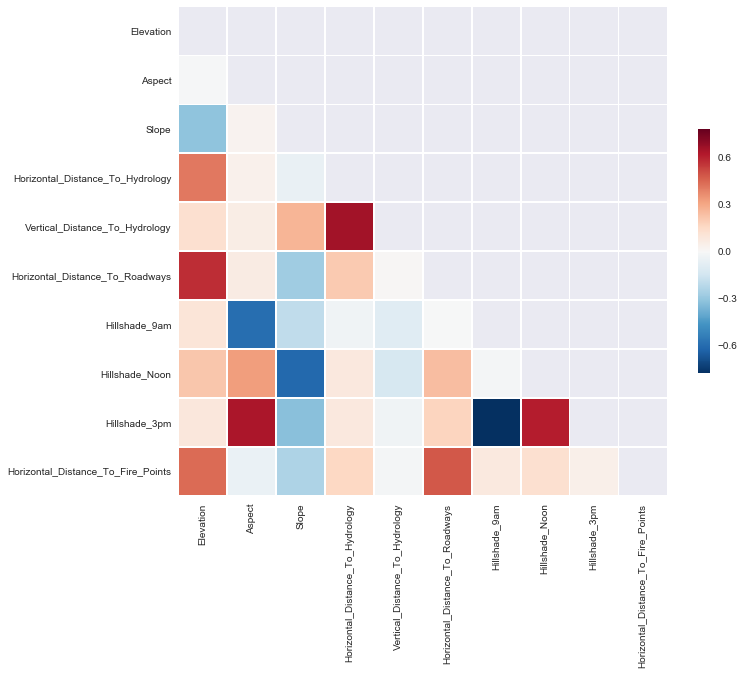

In [6]:
corr = train_df[continuous].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_columns = list(corr.columns)
corr_comparison_list = []
corr_value_list = []
for column in corr:
    temp_corr_columns = corr_columns   
    temp_corr_columns.remove(column)
    for index in corr.loc[temp_corr_columns, column].index:
        corr_comparison_list.append(str(column) + '_vs_' + str(index))
        corr_value_list.append(corr.loc[index, column])
        
corr_df = pd.DataFrame({
    "corr_comparison" : corr_comparison_list,
    "corr_value" : corr_value_list 
})

corr_df = corr_df.iloc[corr_df.corr_value.abs().argsort()][::-1].reset_index()
corr_df = corr_df.loc[:, ~corr_df.columns.str.contains('index')]
print corr_df.loc[:10,:]

Looking at the above correlation matrix, we see combination of variables that may cause collinearity issues in the analysis.

For example Hillshade_3pm is correlated heavily with Hillshade_9am (corr ~ -0.77).

The above dataframe output shows the top 10 (absolute value) correlation values between continuous variables, so we will need to be knowledgeable about having both of the features in the analysis in the top 10 list. The duplicated information may overfit the data and reduce the generalizability of the final analysis

### Visualize continuous variables mapped to 2D plane

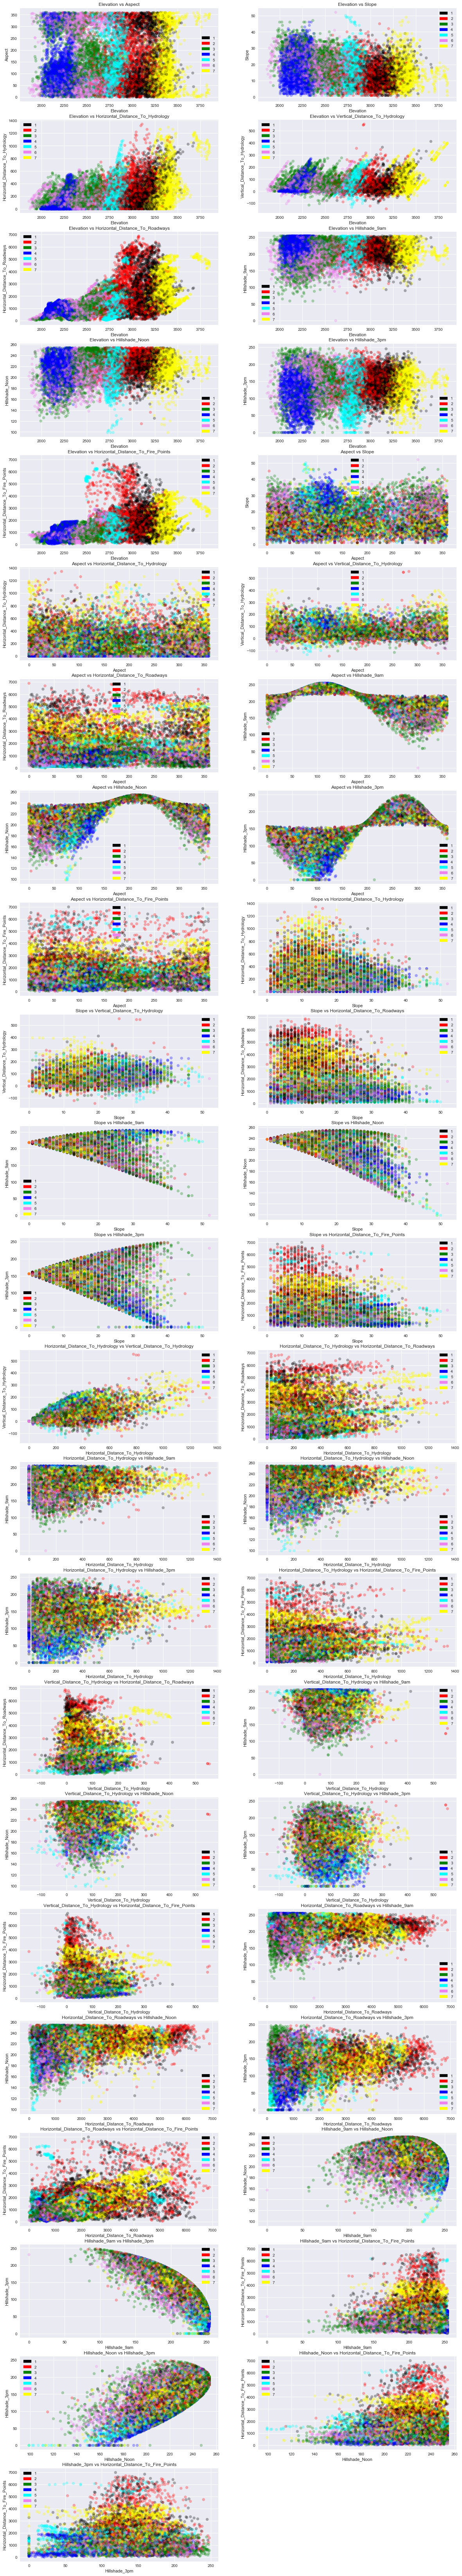

In [7]:
fig = plt.figure(figsize=(20, 120))
gs = gridspec.GridSpec(23, 2) 
df_column_list = list(train_df[continuous].columns)
itr = 0
cmap = mpl.colors.ListedColormap(['black','red', 'green', 'blue', 'cyan', 'violet', 'yellow'])
black_patch = mpatches.Patch(color='black', label='1')
red_patch = mpatches.Patch(color='red', label='2')
green_patch = mpatches.Patch(color='green', label='3')
blue_patch = mpatches.Patch(color='blue', label='4')
cyan_patch = mpatches.Patch(color='cyan', label='5')
violet_patch = mpatches.Patch(color='violet', label='6')
yellow_patch = mpatches.Patch(color='yellow', label='7')


for feature in corr:    
    temp_columns = df_column_list
    index_value = temp_columns.index(feature) + 1
    
    for sub_feature in temp_columns[index_value:]:
        ax = plt.subplot(gs[itr])
        ax.scatter(train_df.loc[:, feature], train_df.loc[:, sub_feature], 
                   c=target, alpha=0.3, cmap=cmap)
        ax.set_xlabel(feature)
        ax.set_ylabel(sub_feature)
        ax.set_title('{} vs {}'.format(feature, sub_feature, fontsize=12))
        ax.legend(handles=[black_patch, red_patch, green_patch, blue_patch, cyan_patch, violet_patch, yellow_patch])
        itr += 1

### Replace missing/bad data in Hillshade 3pm

In [8]:
RF_parameter_grid = {'n_estimators': [300, 500, 600, 700, 800]}


rf_3pm_fix_df = train_df[continuous]
rf_3pm_fix_df = rf_3pm_fix_df.loc[rf_3pm_fix_df['Hillshade_3pm'] != 0.0]
rf_3pm_fix_df_target = rf_3pm_fix_df['Hillshade_3pm']
rf_3pm_fix_df = rf_3pm_fix_df[['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']]

param_searcher = GridSearchCV(RandomForestRegressor(), RF_parameter_grid, cv=5)
X_train_3pm, X_dev_3pm, y_train_3pm, y_dev_3pm = train_test_split(rf_3pm_fix_df, rf_3pm_fix_df_target)
param_searcher.fit(X_train_3pm, y_train_3pm)

model_best_3pm = RandomForestRegressor(**param_searcher.best_params_)
model_best_3pm.fit(X_train_3pm, y_train_3pm)
pred_3pm = model_best_3pm.predict(X_dev_3pm)

In [9]:
difference_3pm_percentage = (pred_3pm/y_dev_3pm - 1)*100
difference_3pm_percentage.describe()

count    3758.000000
mean       -0.006397
std         1.598493
min       -29.238095
25%        -0.341656
50%        -0.007633
75%         0.310519
max        26.861111
Name: Hillshade_3pm, dtype: float64

Very good fit, average difference is 0.04% off with the majority of data (1 and 3rd quartile) in between ~ +/- 0.35 % difference between predicted Hillshade at 3pm and Actual Hillshade at 3pm. Will move forward and replace zero values with this model

In [10]:
itr = 0
while itr < len(train_df):
    if train_df.loc[itr, 'Hillshade_3pm'] == 0:
        train_df.loc[itr, 'Hillshade_3pm'] = model_best_3pm.predict(train_df.loc[itr, ['Elevation', 'Aspect', 'Slope', 
                        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
                       'Horizontal_Distance_To_Fire_Points']].reshape(1,9))
        
    itr += 1
print train_df.Hillshade_3pm.describe()

/Users/mauracullen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


count    15120.000000
mean       135.211928
std         45.603418
min          1.000000
25%        106.000000
50%        138.000000
75%        167.000000
max        248.000000
Name: Hillshade_3pm, dtype: float64


No more zero values for HillShade at 3pm

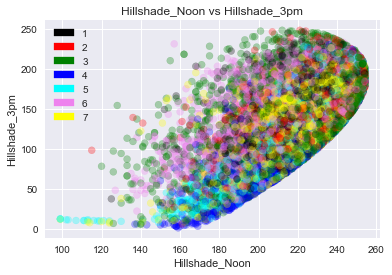

In [11]:
plt.scatter(train_df.loc[:, 'Hillshade_Noon'], train_df.loc[:, 'Hillshade_3pm'], 
           c=target, alpha=0.3, cmap=cmap)
plt.xlabel('Hillshade_Noon')
plt.ylabel('Hillshade_3pm')
plt.title('{} vs {}'.format('Hillshade_Noon', 'Hillshade_3pm', fontsize=12))
plt.legend(handles=[black_patch, red_patch, green_patch, blue_patch, cyan_patch, violet_patch, yellow_patch])

### Skewness information on variables

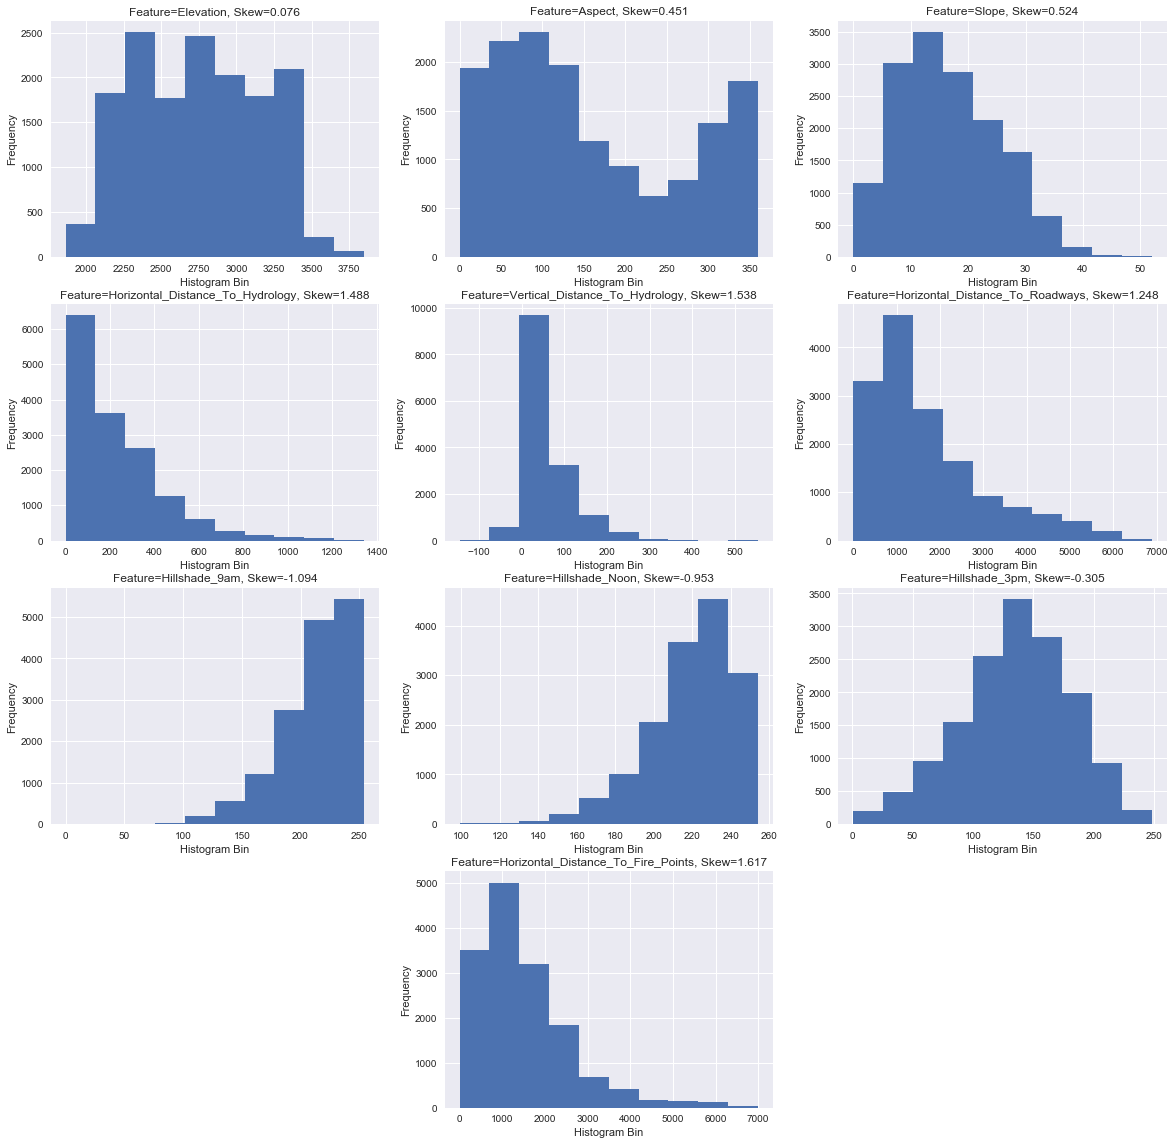

In [12]:
train_df[continuous].skew().sort_values()
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 3) 

itr = 0
for feature in train_df[continuous]:   
    if itr == 9:
        itr += 1
    ax = plt.subplot(gs[itr])
    ax.hist(train_df.loc[:, feature])
    ax.set_xlabel("Histogram Bin")
    ax.set_ylabel("Frequency")
    ax.set_title('Feature={}, Skew={}'.format(feature, round(train_df.loc[:, feature].skew(), 3), fontsize=12))
    
    itr += 1

Looking at the above histograms (with skewness value in the title of each plot), we can see that there are some high skews with potential of some log transformations if the math allows it (i.e cant do a log transformations on a zero) so if the column data has a zero we will have to think of doing something else if needed.

After looking at the scatter plots of 2D projection, we can see that there are some very distance regions for target delineation of target cases (the first nine plots - titles shown below):

Elevation vs all of its other covariates

### Boxplots of continuous variables by Cover_Type

/Users/mauracullen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


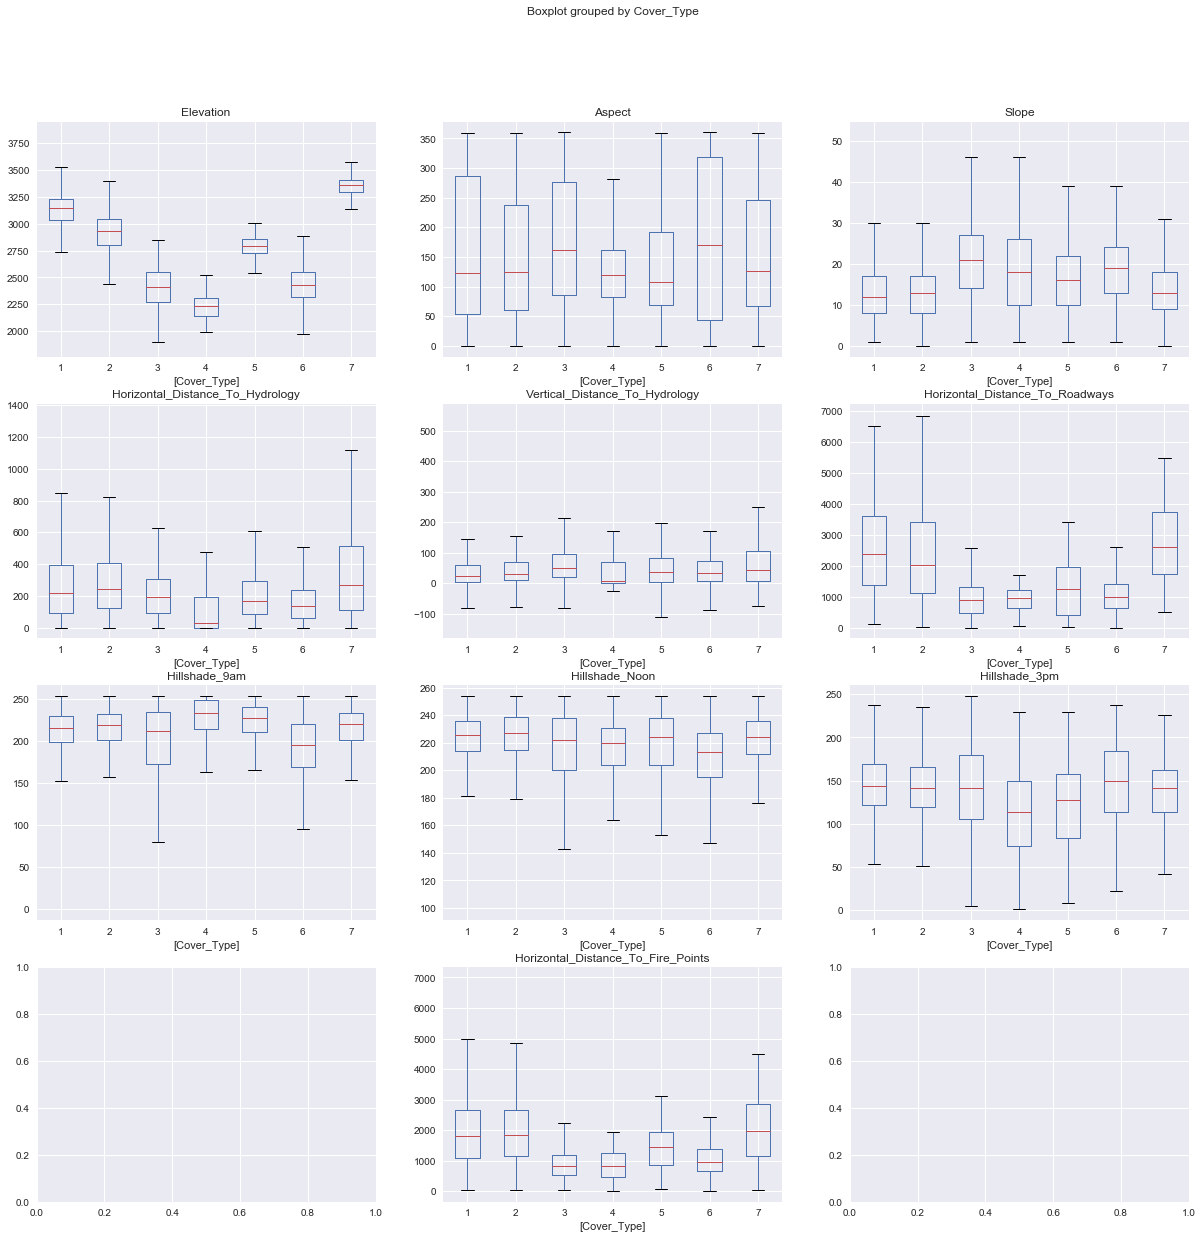

In [13]:
boxplot_df_cont = train_df[:]
boxplot_df_cont['Cover_Type'] = target
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

itr_1 = 0
itr_2 = 0
for feature in continuous:
    if itr_2 == 3:
        itr_2 = 0
        itr_1 += 1
    if itr_1 == 3:
        itr_2 = 1
    temp_list = []
    temp_list.append(feature)
    temp_list.append(u'Cover_Type')
    boxplot_df_cont[temp_list].boxplot(by='Cover_Type', ax=axes[itr_1, itr_2])
    itr_2 += 1
    


Looking at the above boxplots by forest cover type, the elevation shows very distinct values per category. Elevation is looking like it is a very important feature in determining the target value of the problem

### Binary variable exploration

/Users/mauracullen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Axes(0.125,0.8498;0.352273x0.0302)
Axes(0.547727,0.8498;0.352273x0.0302)
Axes(0.125,0.81356;0.352273x0.0302)
Axes(0.547727,0.81356;0.352273x0.0302)
Axes(0.125,0.77732;0.352273x0.0302)
Axes(0.547727,0.77732;0.352273x0.0302)
Axes(0.125,0.74108;0.352273x0.0302)
Axes(0.547727,0.74108;0.352273x0.0302)
Axes(0.125,0.70484;0.352273x0.0302)
Axes(0.547727,0.70484;0.352273x0.0302)
Axes(0.125,0.6686;0.352273x0.0302)
Axes(0.547727,0.6686;0.352273x0.0302)
Axes(0.125,0.63236;0.352273x0.0302)
Axes(0.547727,0.63236;0.352273x0.0302)
Axes(0.125,0.59612;0.352273x0.0302)
Axes(0.547727,0.59612;0.352273x0.0302)
Axes(0.125,0.55988;0.352273x0.0302)
Axes(0.547727,0.55988;0.352273x0.0302)
Axes(0.125,0.52364;0.352273x0.0302)
Axes(0.547727,0.52364;0.352273x0.0302)
Axes(0.125,0.4874;0.352273x0.0302)
Axes(0.547727,0.4874;0.352273x0.0302)
Axes(0.125,0.45116;0.352273x0.0302)
Axes(0.547727,0.45116;0.352273x0.0302)
Axes(0.125,0.41492;0.352273x0.0302)
Axes(0.547727,0.41492;0.352273x0.0302)
Axes(0.125,0.37868;0.352273x0.0

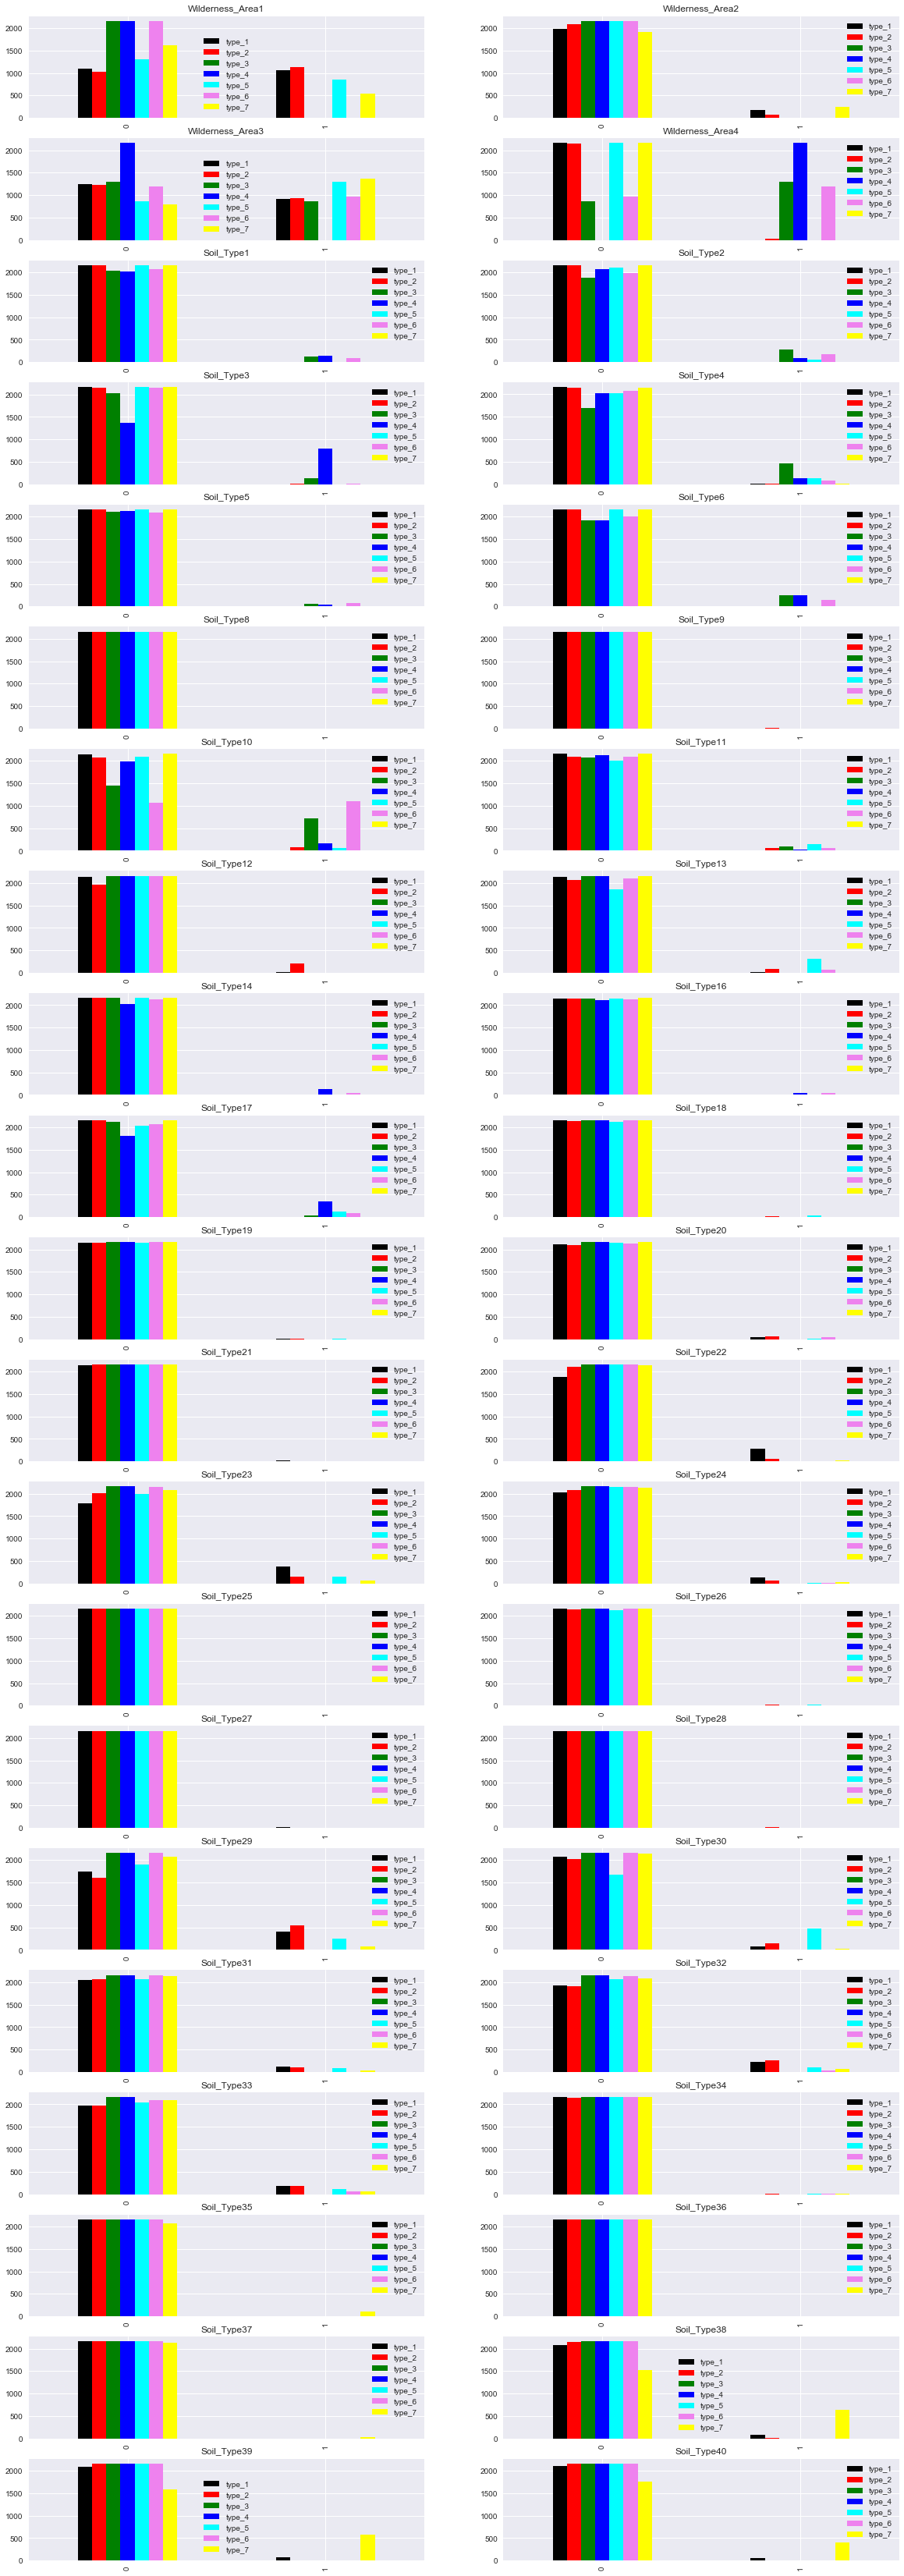

In [14]:
df_binary = train_df[binary]
df_binary['Cover_Type'] = target
fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(20, 60))

df_binary_columns = []
df_dict = {}
itr = 0
master_df = pd.DataFrame()
pic_itr1 = 0
pic_itr2 = 0
for feature in df_binary:
    if 'Cover_Type' not in feature:
        df_binary_columns.append(feature)
        temp_list = []
        temp_list.append(feature)
        temp_list.append(u'Cover_Type')
        
        if pic_itr2 == 2:
            pic_itr2 = 0
            pic_itr1 += 1
        
        itr = 1
        for name, group in df_binary.loc[:, temp_list].groupby('Cover_Type'):
            if itr == 1:
                df_out = group[feature].value_counts()
                df_out.name = 'type_{}'.format(itr)
            else:
                df_temp = group[feature].value_counts()
                df_temp.name = 'type_{}'.format(itr)
                df_out = pd.concat([df_out, df_temp], axis = 1)
            itr += 1
            
        
        print df_out.plot(kind='bar', title =feature, 
                          color=['black','red', 'green', 'blue', 'cyan', 'violet', 'yellow'],
                          ax=axes[pic_itr1, pic_itr2])
        master_df = master_df.append(df_out.rename({0: feature + '_0', 1: feature + '_1'}))
        
        pic_itr2 += 1
        
# print master_df

It appears that a lot of the soil type information is very similar with not a lot of added information to the data analysis. This information along with the continuous data information will help make engineering feature elimination decisions.

### Regularization study on variables

In [15]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

linreg = LinearRegression()
linreg.fit(train_df[predictors], target)

ridge = RidgeCV(alphas= np.linspace(5, 50, 100))
ridge.fit(train_df[predictors], target)

lasso = LassoCV(alphas= 2. ** np.arange(-10, 10))
lasso.fit(train_df[predictors], target)

en = ElasticNetCV(l1_ratio=np.linspace(.05, .95, 20), alphas= 2. ** np.arange(-10, 10))
en.fit(train_df[predictors], target)

/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  9.76562e-04,   1.95312e-03,   3.90625e-03,   7.81250e-03,
         1.56250e-02,   3.12500e-02,   6.25000e-02,   1.25000e-01,
         2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02,   5.12000e+02]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.05   ,  0.09737,  0.14474,  0.19211,  0.23947,  0.28684,
        0.33421,  0.38158,  0.42895,  0.47632,  0.52368,  0.57105,
        0.61842,  0.66579,  0.71316,  0.76053,  0.80789,  0.85526,
        0.90263,  0.95   ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [16]:
print 'Train R-squared: {:.3}'.format(linreg.score(train_df[predictors], target))
print 'Ridge Train R-squared: {:.3}'.format(ridge.score(train_df[predictors], target))
print 'Lasso Train R-squared: {:.3}'.format(lasso.score(train_df[predictors], target))
print 'EN Train R-squared: {:.3}'.format(en.score(train_df[predictors], target))

Train R-squared: 0.404
Ridge Train R-squared: 0.403
Lasso Train R-squared: 0.402
EN Train R-squared: 0.402


In [17]:
coeffs = pd.DataFrame({
        'variable': predictors,
        'OLS': linreg.coef_,
        'Ridge': ridge.coef_,
        'Lasso': lasso.coef_,
        'ElasticNet': en.coef_
    })

coeffs

ElasticNet     Lasso       OLS     Ridge                            variable
0    -0.000502 -0.000530 -0.000483 -0.000355                           Elevation
1     0.000733  0.000733  0.000729  0.000725                              Aspect
2     0.011519  0.011411  0.011779  0.012530                               Slope
3    -0.001025 -0.001020 -0.001043 -0.001051    Horizontal_Distance_To_Hydrology
4     0.001705  0.001708  0.001706  0.001684      Vertical_Distance_To_Hydrology
5    -0.000155 -0.000155 -0.000157 -0.000156     Horizontal_Distance_To_Roadways
6     0.023615  0.023535  0.023828  0.024591                       Hillshade_9am
7    -0.018454 -0.018331 -0.018587 -0.019490                      Hillshade_Noon
8     0.015876  0.015796  0.016161  0.016812                       Hillshade_3pm
9     0.000103  0.000104  0.000105  0.000101  Horizontal_Distance_To_Fire_Points
10   -0.675222 -0.762621 -0.552040 -0.548052                    Wilderness_Area1
11   -0.382541 -0.464514 -0.285962 -0.298904                    Wilderness_Area2
12    0.510903  0.428061  0.647628  0.634325                    Wilderness_Area3
13    0.089103  0.001339  0.190374  0.212630                    Wilderness_Area4
14    0.000000  0.000000 -0.171609 -0.177192                          Soil_Type1
15    0.071089  0.077511 -0.110705 -0.128591                          Soil_Type2
16   -0.332257 -0.326296 -0.527240 -0.540036                          Soil_Type3
17   -0.432528 -0.422987 -0.665648 -0.682332                          Soil_Type4
18    0.309492  0.311518  0.215165  0.194770                          Soil_Type5
19    0.027291  0.034765 -0.134886 -0.164373                          Soil_Type6
20   -0.000000 -0.000000 -0.765826 -0.137036                          Soil_Type8
21   -0.000000 -0.000000 -1.414375 -0.968358                          Soil_Type9
22    0.562004  0.571053  0.371640  0.342941                         Soil_Type10
23   -0.000000 -0.000000 -0.245722 -0.277320                         Soil_Type11
24   -0.939396 -0.920900 -1.218374 -1.247216                         Soil_Type12
25    0.353912  0.369813  0.158181  0.102468                         Soil_Type13
26    0.096851  0.097486 -0.008060 -0.016652                         Soil_Type14
27    0.109952  0.113296  0.028441  0.006986                         Soil_Type16
28    0.188876  0.194212  0.010841 -0.001722                         Soil_Type17
29    0.393499  0.395259  0.414696  0.372719                         Soil_Type18
30   -0.112820 -0.076062 -0.643599 -0.648936                         Soil_Type19
31   -0.537715 -0.517672 -0.863659 -0.884955                         Soil_Type20
32   -0.588295 -0.543137 -1.731152 -1.389755                         Soil_Type21
33   -1.502025 -1.475449 -1.765685 -1.840026                         Soil_Type22
34   -0.658972 -0.634524 -0.902181 -0.979474                         Soil_Type23
35   -1.073583 -1.050039 -1.353889 -1.412583                         Soil_Type24
36   -0.000000 -0.000000 -1.653343 -0.293470                         Soil_Type25
37   -0.265924 -0.239492 -0.757699 -0.741584                         Soil_Type26
38   -0.000000 -0.000000 -1.083971 -0.887753                         Soil_Type27
39   -0.000000 -0.000000 -1.107532 -0.734181                         Soil_Type28
40   -0.155192 -0.130182 -0.381239 -0.464897                         Soil_Type29
41    0.884142  0.905851  0.693809  0.614904                         Soil_Type30
42   -0.881697 -0.860457 -1.155467 -1.211091                         Soil_Type31
43   -0.972071 -0.949874 -1.221781 -1.292084                         Soil_Type32
44   -0.636748 -0.615160 -0.888164 -0.954284                         Soil_Type33
45    0.000000  0.000000  0.047121 -0.013603                         Soil_Type34
46    3.263953  3.312614  3.195258  2.928805                         Soil_Type35
47    1.513347  1.579930  2.803034  1.790898                         Soil_Type36
48    3.848916  3.947876  4.122383 

Looking at the above regression equations, we see that they are not good for fit prediction. However, we also see that some variables are poor added information for prediction:

Soil_Type1
Soil_Type8
Soil_Type9
Soil_Type11
Soil_Type25
Soil_Type27
Soil_Type28
Soil_Type34

### Split train/dev sets

In [18]:
X_train, X_dev, y_train, y_dev = train_test_split(train_df, target)

## Decision Tree

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Print Classification Summary Scored in Development 
print "Accuracy Score on Dev Set: %0.2f%%" % (dt.score(X_dev,y_dev))
preds = dt.predict(X_dev)
mse = np.mean((preds - y_dev) ** 2)
print 'Mean squared error = {}'.format(mse)
print 'R^2 = {}\n'.format(dt.score(X_train, y_train))

print metrics.classification_report(y_dev, preds) # target_names = target_names_list)

Accuracy Score on Dev Set: 0.79%
Mean squared error = 1.94206349206
R^2 = 1.0

             precision    recall  f1-score   support

          1       0.65      0.65      0.65       525
          2       0.63      0.61      0.62       548
          3       0.77      0.75      0.76       554
          4       0.92      0.92      0.92       523
          5       0.86      0.86      0.86       562
          6       0.76      0.79      0.78       531
          7       0.89      0.92      0.91       537

avg / total       0.79      0.79      0.79      3780



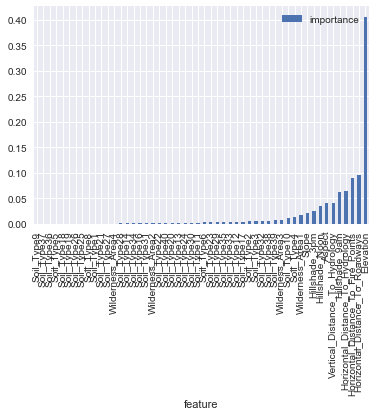

In [20]:
# Report Feature Importnace in DTREE 
importance_df = pd.DataFrame({
        'feature': predictors,
        'importance': dt.feature_importances_
    })

importance_df.sort_values('importance').plot(x='feature', kind='bar')

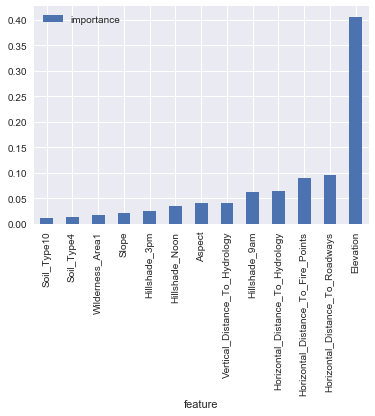

In [21]:

# only plot importances > 0.01
importance_df1 = importance_df[importance_df['importance'] >= 0.01]
importance_df1.sort_values('importance').plot(x='feature', kind='bar')

Looking at the decision tree, we also do not see any of the variables that Lasso and Ridge eliminated in the important variables.

# Filtered Dataset

In [22]:
def aspect_transform(aspect):
    if aspect >= 0 and aspect < 45:
        # N-NE
        return 1
    elif aspect >= 45 and aspect < 90:
        # N-NE
        return 2
    elif aspect >= 90 and aspect < 135:
        # N-NE
        return 3
    elif aspect >= 135 and aspect < 180:
        # N-NE
        return 4
    elif aspect >= 180 and aspect < 225:
        # N-NE
        return 5
    elif aspect >= 225 and aspect < 270:
        # N-NE
        return 6
    elif aspect >= 270 and aspect < 315:
        # N-NE
        return 7
    elif aspect >= 315 and aspect < 360:
        # N-NE
        return 8
    else:
        return -1
    
def binary_hydrology(hydrology):
    if hydrology >= 0:
        # N-NE
        return 1
    elif hydrology < 0:
        # N-NE
        return 0
    else:
        return -1

# Transforming Dataset

In [23]:
normalize_scaler = MinMaxScaler()
X_train_normalize_continuous = normalize_scaler.fit_transform(X_train.loc[:, continuous])
X_dev_normalize_continuous = normalize_scaler.transform(X_dev.loc[:, continuous])

demean_train = X_train.loc[:, continuous]
demean_train = (demean_train - demean_train.mean())/demean_train.std()
demean_test = X_dev.loc[:, continuous]
demean_test = (demean_test - demean_test.mean())/demean_test.std()

squared_train = X_train.loc[:, continuous]
squared_df_train = np.square(squared_train)
squared_test = X_dev.loc[:, continuous]
squared_df_test = np.square(squared_test)

continuous_custom = list(continuous)
continuous_custom.append("Aspect2")
continuous_custom.append("Aspect3")
continuous_custom.append("Verticle_Hydro_Binary")
continuous_custom.append("Hydro_rms")
continuous_custom.append("Elev_vs_vHydro")
continuous_custom.append("Elev_vs_hHydro")
continuous_custom.append("Elev_vs_hRoad")
continuous_custom.append("Elev_vs_hFire")
continuous_custom.append("Hydro_vs_Fire_add")
continuous_custom.append("Hydro_vs_Fire_sub")
continuous_custom.append("Hydro_vs_Road_add")
continuous_custom.append("Hydro_vs_Road_sub")
continuous_custom.append("Road_vs_Fire_add")
continuous_custom.append("Road_vs_Fire_sub")

custom_transformation_train = train_df.loc[:, continuous]
custom_transformation_train['Aspect2'] = np.power(custom_transformation_train['Aspect'], 1./2)
custom_transformation_train['Aspect3'] = custom_transformation_train.Aspect.map(aspect_transform)
custom_transformation_train['Verticle_Hydro_Binary'] = custom_transformation_train.Vertical_Distance_To_Hydrology.map(binary_hydrology)
custom_transformation_train['Hydro_rms'] = (custom_transformation_train['Horizontal_Distance_To_Hydrology']**2+custom_transformation_train['Vertical_Distance_To_Hydrology']**2)**0.5
custom_transformation_train['Elev_vs_vHydro'] = custom_transformation_train.Elevation - custom_transformation_train.Vertical_Distance_To_Hydrology
custom_transformation_train['Elev_vs_hHydro'] = custom_transformation_train.Elevation - custom_transformation_train.Horizontal_Distance_To_Hydrology
custom_transformation_train['Elev_vs_hRoad'] = custom_transformation_train.Elevation - custom_transformation_train.Horizontal_Distance_To_Roadways
custom_transformation_train['Elev_vs_hFire'] = custom_transformation_train.Elevation - custom_transformation_train.Horizontal_Distance_To_Fire_Points
custom_transformation_train['Hydro_vs_Fire_add'] = custom_transformation_train.Horizontal_Distance_To_Hydrology - custom_transformation_train.Horizontal_Distance_To_Fire_Points
custom_transformation_train['Hydro_vs_Fire_sub'] = custom_transformation_train.Horizontal_Distance_To_Hydrology - custom_transformation_train.Horizontal_Distance_To_Fire_Points
custom_transformation_train['Hydro_vs_Road_add'] = custom_transformation_train.Horizontal_Distance_To_Hydrology - custom_transformation_train.Horizontal_Distance_To_Roadways
custom_transformation_train['Hydro_vs_Road_sub'] = custom_transformation_train.Horizontal_Distance_To_Hydrology - custom_transformation_train.Horizontal_Distance_To_Roadways
custom_transformation_train['Road_vs_Fire_add'] = custom_transformation_train.Horizontal_Distance_To_Roadways - custom_transformation_train.Horizontal_Distance_To_Fire_Points
custom_transformation_train['Road_vs_Fire_sub'] = custom_transformation_train.Horizontal_Distance_To_Roadways - custom_transformation_train.Horizontal_Distance_To_Fire_Points

custom_transformation_test = test_df.loc[:, continuous]
custom_transformation_test['Aspect2'] = np.power(custom_transformation_test['Aspect'], 1./2)
custom_transformation_test['Aspect3'] = custom_transformation_test.Aspect.map(aspect_transform)
custom_transformation_test['Verticle_Hydro_Binary'] = custom_transformation_test.Vertical_Distance_To_Hydrology.map(binary_hydrology)
custom_transformation_test['Hydro_rms'] = (custom_transformation_test['Horizontal_Distance_To_Hydrology']**2+custom_transformation_test['Vertical_Distance_To_Hydrology']**2)**0.5
custom_transformation_test['Elev_vs_vHydro'] = custom_transformation_test.Elevation - custom_transformation_test.Vertical_Distance_To_Hydrology
custom_transformation_test['Elev_vs_hHydro'] = custom_transformation_test.Elevation - custom_transformation_test.Horizontal_Distance_To_Hydrology
custom_transformation_test['Elev_vs_hRoad'] = custom_transformation_test.Elevation - custom_transformation_test.Horizontal_Distance_To_Roadways
custom_transformation_test['Elev_vs_hFire'] = custom_transformation_test.Elevation - custom_transformation_test.Horizontal_Distance_To_Fire_Points
custom_transformation_test['Hydro_vs_Fire_add'] = custom_transformation_test.Horizontal_Distance_To_Hydrology - custom_transformation_test.Horizontal_Distance_To_Fire_Points
custom_transformation_test['Hydro_vs_Fire_sub'] = custom_transformation_test.Horizontal_Distance_To_Hydrology - custom_transformation_test.Horizontal_Distance_To_Fire_Points
custom_transformation_test['Hydro_vs_Road_add'] = custom_transformation_test.Horizontal_Distance_To_Hydrology - custom_transformation_test.Horizontal_Distance_To_Roadways
custom_transformation_test['Hydro_vs_Road_sub'] = custom_transformation_test.Horizontal_Distance_To_Hydrology - custom_transformation_test.Horizontal_Distance_To_Roadways
custom_transformation_test['Road_vs_Fire_add'] = custom_transformation_test.Horizontal_Distance_To_Roadways - custom_transformation_test.Horizontal_Distance_To_Fire_Points
custom_transformation_test['Road_vs_Fire_sub'] = custom_transformation_test.Horizontal_Distance_To_Roadways - custom_transformation_test.Horizontal_Distance_To_Fire_Points


custom_transformation_train_filtered = custom_transformation_train[['Aspect2', 'Aspect3', 'Verticle_Hydro_Binary', 'Hydro_rms', 'Elev_vs_vHydro', 'Elev_vs_hHydro', 'Elev_vs_hRoad', 'Elev_vs_hFire', 'Hydro_vs_Fire_add', 'Hydro_vs_Fire_sub', 'Hydro_vs_Road_add', 'Hydro_vs_Road_sub', 'Road_vs_Fire_add', 'Road_vs_Fire_sub', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]
custom_transformation_test_filtered = custom_transformation_test[['Aspect2', 'Aspect3', 'Verticle_Hydro_Binary', 'Hydro_rms', 'Elev_vs_vHydro', 'Elev_vs_hHydro', 'Elev_vs_hRoad', 'Elev_vs_hFire', 'Hydro_vs_Fire_add', 'Hydro_vs_Fire_sub', 'Hydro_vs_Road_add', 'Hydro_vs_Road_sub', 'Road_vs_Fire_add', 'Road_vs_Fire_sub', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]


In [141]:
custom_transformation_test_filtered = custom_transformation_test[['Aspect2', 'Aspect3', 'Verticle_Hydro_Binary', 'Hydro_rms', 'Elev_vs_vHydro', 'Elev_vs_hHydro', 'Elev_vs_hRoad', 'Elev_vs_hFire', 'Hydro_vs_Fire_add', 'Hydro_vs_Fire_sub', 'Hydro_vs_Road_add', 'Hydro_vs_Road_sub', 'Road_vs_Fire_add', 'Road_vs_Fire_sub', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]

print custom_transformation_test_filtered.shape

(565892, 17)


In [24]:
X_train_cust, X_dev_cust, y_train_cust, y_dev_cust = train_test_split(custom_transformation_train, target)
X_train_cust_filt, X_dev_cust_filt, y_train_cust_filt, y_dev_cust_filt = train_test_split(custom_transformation_train_filtered, target)


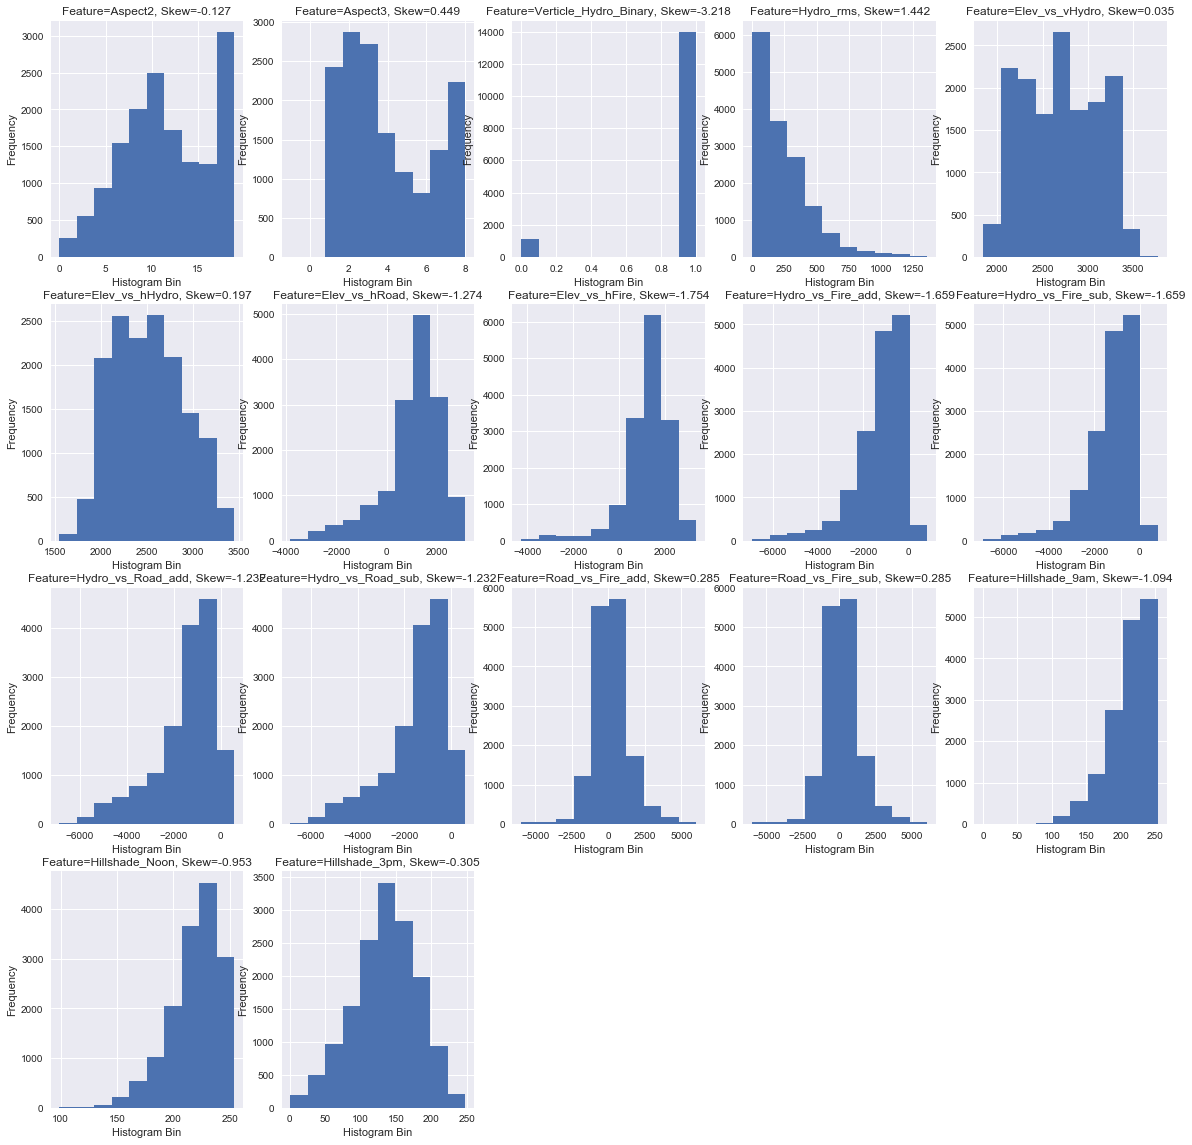

In [25]:
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 5) 

itr = 0
for feature in custom_transformation_train_filtered.columns:   
    ax = plt.subplot(gs[itr])
    ax.hist(custom_transformation_train_filtered.loc[:, feature])
    ax.set_xlabel("Histogram Bin")
    ax.set_ylabel("Frequency")
    ax.set_title('Feature={}, Skew={}'.format(feature, round(custom_transformation_train_filtered.loc[:, feature].skew(), 3), fontsize=12))
    
    itr += 1

In [26]:
# estimator.get_params().keys()
def model_optimize(model, X_train, y_train, X_test, y_test, param_dict, return_model = False):
    
    df_param = pd.DataFrame()
    
    if len(param_dict) > 0:
        param_searcher = GridSearchCV(model(), param_dict, cv=5)
        param_searcher.fit(X_train, y_train)

        df_param = pd.DataFrame(list(param_searcher.cv_results_['params']))
        df_param['mean_test_score'] = param_searcher.cv_results_['mean_test_score']
        df_param = df_param.sort_values('mean_test_score', ascending=False)
        df_param = df_param.loc[:, ~df_param.columns.str.contains('index')]

        model_best = model(**param_searcher.best_params_)
    else:
        model_best = model()
        
        
    model_best.fit(X_train, y_train)
    model_score = model_best.score(X_test, y_test)
    pred = model_best.predict(X_test)
    
    df_confusion = pd.DataFrame(confusion_matrix(y_test, pred), 
                                columns=['Predicted=1', 'Predicted=2', 'Predicted=3', 'Predicted=4', 'Predicted=5', 'Predicted=6', 'Predicted=7'], 
                                index=['Actual=1', 'Actual=2', 'Actual=3', 'Actual=4', 'Actual=5', 'Actual=6', 'Actual=7']
    )
    
    if return_model == False:
        return model_score, df_param, df_confusion
    else: 
        return model_score, df_param, df_confusion, model_best
        

In [27]:
# Overview of Dataset Metrics
print "\nStandard Dataset" 
print len(X_train.columns)
print X_train.columns

print "\nRaw+New Features Dataset"
print len(X_train_cust.columns)
print X_train_cust.columns

print "\nRaw+New Features Filtered Dataset"
print len(X_train_cust_filt.columns)
print X_train_cust_filt.columns



Standard Dataset
52
Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36', u'Soil_Type37', u'Soil_Type38', u'Soil_Type39', u'Soil_Type40'], dtype='object')

Raw+New Features Dataset
24
Index

### kNN - k-Nearest Neighbors

In [28]:
knn_parameter_grid = {
    'n_neighbors': [1, 2, 5, 7, 10, 15, 20, 25, 35, 45, 60, 80, 100, 150],
    'metric': ['euclidean', 'manhattan']
}

kNN_model_score, kNN_df_param, kNN_df_confusion, kNN_model = model_optimize(KNeighborsClassifier, X_train, y_train, X_dev, y_dev, knn_parameter_grid, return_model=True)
kNN_model_score_custom, kNN_df_param_custom, kNN_df_confusion_custom = model_optimize(KNeighborsClassifier, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, knn_parameter_grid)
kNN_model_score_custom_filt, kNN_df_param_custom_filt, kNN_df_confusion_custom_filt = model_optimize(KNeighborsClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, knn_parameter_grid)

In [151]:
kNN_df_param

metric  n_neighbors  mean_test_score
14  manhattan            1         0.827778
0   euclidean            1         0.826455
15  manhattan            2         0.806261
1   euclidean            2         0.801411
16  manhattan            5         0.799824
2   euclidean            5         0.787390
17  manhattan            7         0.783951
18  manhattan           10         0.771605
3   euclidean            7         0.770723
19  manhattan           15         0.758289
4   euclidean           10         0.754497
20  manhattan           20         0.749647
21  manhattan           25         0.739859
5   euclidean           15         0.734656
22  manhattan           35         0.722487
6   euclidean           20         0.719489
7   euclidean           25         0.713228
23  manhattan           45         0.710494
24  manhattan           60         0.696208
8   euclidean           35         0.691005
25  manhattan           80         0.679894
9   euclidean           45         0.678748
26  manhattan          100         0.663316
10  euclidean           60         0.661728
27  manhattan          150         0.640300
11  euclidean           80         0.639594
12  euclidean          100         0.622663
13  euclidean          150         0.600970

In [29]:
print kNN_model_score
print kNN_model_score_custom
print kNN_model_score_custom_filt

0.847883597884
0.825132275132
0.801851851852


### Naive Bayes

In [30]:
NB_parameter_grid = {}

NB_model_score, NB_df_param, NB_df_confusion = model_optimize(GaussianNB, X_train, y_train, X_dev, y_dev, NB_parameter_grid)
NB_model_score_custom, NB_df_param_custom, NB_df_confusion_custom = model_optimize(GaussianNB, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, NB_parameter_grid)
NB_model_score_custom_filt, NB_df_param_custom_filt, NB_df_confusion_custom_filt = model_optimize(GaussianNB, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, NB_parameter_grid)

In [31]:
print NB_model_score
print NB_model_score_custom
print NB_model_score_custom_filt

0.592857142857
0.608994708995
0.590476190476


### Decision Tree

In [32]:
DT_parameter_grid = {'criterion': ['gini', 'entropy'],
                     'min_samples_leaf': [1, 2, 5, 10, 20],
                     'max_features': [2, 3, 5, 10, 15, 30, 52], 
                     'max_depth': [1, 2, 3, 5, 10, 15, 20, 30, 40]}
DT_parameter_filtered1 = {'criterion': ['gini', 'entropy'],
                     'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80],
                     'max_features': [2, 3, 5, 14], 
                     'max_depth': [1, 2, 3, 5, 10, 15, 20, 30, 40]}
DT_parameter_filtered2 = {'criterion': ['gini', 'entropy'],
                     'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80],
                     'max_features': [2, 3, 5, 10], 
                     'max_depth': [1, 2, 3, 5, 10, 15, 20, 30, 40]}

DT_model_score, DT_df_param, DT_df_confusion = model_optimize(DecisionTreeClassifier, X_train, y_train, X_dev, y_dev, DT_parameter_grid)
DT_model_score_custom, DT_df_param_custom, DT_df_confusion_custom = model_optimize(DecisionTreeClassifier, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, DT_parameter_filtered2)
DT_model_score_custom_filt, DT_df_param_custom_filt, DT_df_confusion_custom_filt, DT_df_confusion_model = model_optimize(DecisionTreeClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, DT_parameter_filtered2, return_model=True)


In [33]:
print DT_model_score
print DT_model_score_custom
print DT_model_score_custom_filt

0.765343915344
0.763756613757
0.768783068783


### Random Forest

In [34]:
RF_parameter_grid = {'criterion': ['entropy'],
                     'n_estimators': [300, 500, 600, 700, 800]}


RF_model_score, RF_df_param, RF_df_confusion, RF_df_model = model_optimize(RandomForestClassifier, X_train, y_train, X_dev, y_dev, RF_parameter_grid, True)
RF_model_score_custom, RF_df_param_custom, RF_df_confusion_custom, RF_custom_model = model_optimize(RandomForestClassifier, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, RF_parameter_grid, True)
RF_model_score_custom_filt, RF_df_param_custom_filt, RF_df_confusion_custom_filt, RF_custom_filt_model = model_optimize(RandomForestClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, RF_parameter_grid, True)


In [152]:
RF_df_param

criterion  n_estimators  mean_test_score
1   entropy           500         0.856878
4   entropy           800         0.856173
0   entropy           300         0.855732
3   entropy           700         0.855556
2   entropy           600         0.855379

In [35]:
print RF_model_score
print RF_model_score_custom
print RF_model_score_custom_filt

0.863756613757
0.853439153439
0.857936507937


### AdaBoost

Used best n_estimator for each version of the model above to fill into AdaBoostClassifier

In [37]:
AB = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=600)
AB_custom = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=700)
AB_custom_filt = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=600)


AB.fit(X_train, y_train)
AB_custom.fit(X_train_cust, y_train_cust)
AB_custom_filt.fit(X_train_cust_filt, y_train_cust_filt)


AB_model_score = AB.score(X_dev, y_dev)
AB_model_score_custom = AB_custom.score(X_dev_cust, y_dev_cust)
AB_model_score_custom_filt = AB_custom_filt.score(X_dev_cust_filt, y_dev_cust_filt)

pred = AB.predict(X_dev)
pred_custom = AB_custom.predict(X_dev_cust)
pred_custom_filt = AB_custom_filt.predict(X_dev_cust_filt)

AB_df_confusion = pd.DataFrame(confusion_matrix(y_dev, pred), 
                            columns=['Predicted=1', 'Predicted=2', 'Predicted=3', 'Predicted=4', 'Predicted=5', 'Predicted=6', 'Predicted=7'], 
                            index=['Actual=1', 'Actual=2', 'Actual=3', 'Actual=4', 'Actual=5', 'Actual=6', 'Actual=7'])
AB_df_confusion_custom = pd.DataFrame(confusion_matrix(y_dev, pred_custom), 
                            columns=['Predicted=1', 'Predicted=2', 'Predicted=3', 'Predicted=4', 'Predicted=5', 'Predicted=6', 'Predicted=7'], 
                            index=['Actual=1', 'Actual=2', 'Actual=3', 'Actual=4', 'Actual=5', 'Actual=6', 'Actual=7'])
AB_df_confusion_custom_filt = pd.DataFrame(confusion_matrix(y_dev, pred_custom), 
                            columns=['Predicted=1', 'Predicted=2', 'Predicted=3', 'Predicted=4', 'Predicted=5', 'Predicted=6', 'Predicted=7'], 
                            index=['Actual=1', 'Actual=2', 'Actual=3', 'Actual=4', 'Actual=5', 'Actual=6', 'Actual=7'])


In [38]:
print AB_model_score
print AB_model_score_custom
print AB_model_score_custom_filt

0.844973544974
0.856613756614
0.85582010582


In [39]:
XADA_parameter_grid = {'base_estimator': [RandomForestClassifier()],
    'n_estimators': [300, 500, 600, 700, 800], 
    'learning_rate': [25,50,100,150]}

# base_estimator = RandomForestClassifier
# n_estimators, base_estimator, learning_rate, algorithm

ADA_model_score_custom_filt, ADA_df_param_custom_filt, ADA_df_confusion_custom_filt, ADA_custom_filt_model = model_optimize(AdaBoostClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, XADA_parameter_grid, return_model = True)


/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:531: RuntimeWarning: overflow encountered in exp
  (estimator_weight < 0)))
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:164: RuntimeWarning: invalid value encountered in divide
  sample_weight /= sample_weight_sum
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:519: RuntimeWarning: invalid value encountered in less
  proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:530: RuntimeWarning: invalid value encountered in greater
  ((sample_weight > 0) |
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:531: RuntimeWarning: invalid value encountered in less
  (estimator_weight < 0)))
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight

In [40]:
print ADA_model_score_custom_filt

0.83544973545


### Gradient Boost

In [41]:
GB_parameter_grid = {
    'n_estimators': [300, 400, 500, 600, 700]
}

GB_model_score, GB_df_param, GB_df_confusion, GB_model = model_optimize(GradientBoostingClassifier, X_train, y_train, X_dev, y_dev, GB_parameter_grid, True)
GB_model_score_custom, GB_df_param_custom, GB_df_confusion_custom = model_optimize(GradientBoostingClassifier, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, GB_parameter_grid)
GB_model_score_custom_filt, GB_df_param_custom_filt, GB_df_confusion_custom_filt = model_optimize(GradientBoostingClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, GB_parameter_grid)

In [42]:
print GB_model_score
print GB_model_score_custom
print GB_model_score_custom_filt

0.834920634921
0.824603174603
0.819047619048


In [153]:
GB_df_param

n_estimators  mean_test_score
3           600         0.828836
4           700         0.828836
2           500         0.828660
1           400         0.827601
0           300         0.821252

###  Support Vector Classification

In [43]:
param_grid_svm = {'C': [1500, 2000, 2500], 
              'gamma': [0.5, 1.0, 1.5], 
              'kernel': ['rbf']}

SVM_model_score, SVM_df_param, SVM_df_confusion = model_optimize(SVC, X_train, y_train, X_dev, y_dev, param_grid_svm)
SVM_model_score_custom, SVM_df_param_custom, SVM_df_confusion_custom = model_optimize(SVC, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, param_grid_svm)
SVM_model_score_custom_filt, SVM_df_param_custom_filt, SVM_df_confusion_custom_filt = model_optimize(SVC, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, param_grid_svm)

In [44]:
print SVM_model_score
print SVM_model_score_custom
print SVM_model_score_custom_filt

0.13835978836
0.13544973545
0.135185185185


In [51]:
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_dev_minmax = minmax.fit_transform(X_dev)
X_train_cust_minmax = minmax.fit_transform(X_train_cust)
X_dev_cust_minmax = minmax.fit_transform(X_dev_cust)
X_train_cust_filt_minmax = minmax.fit_transform(X_train_cust_filt)
X_dev_cust_filt_minmax = minmax.fit_transform(X_dev_cust_filt)

SVM_model_score, SVM_df_param, SVM_df_confusion = model_optimize(SVC, X_train_minmax, y_train, X_dev_minmax, y_dev, param_grid_svm)
SVM_model_score_custom, SVM_df_param_custom, SVM_df_confusion_custom = model_optimize(SVC, X_train_cust_minmax, y_train_cust, X_dev_cust_minmax, y_dev_cust, param_grid_svm)
SVM_model_score_custom_filt, SVM_df_param_custom_filt, SVM_df_confusion_custom_filt = model_optimize(SVC, X_train_cust_filt_minmax, y_train_cust_filt, X_dev_cust_filt_minmax, y_dev_cust_filt, param_grid_svm)

KeyboardInterrupt: 

In [45]:
XRF_parameter_grid = {'criterion': ['entropy'],
                     'n_estimators': [300, 500, 600, 700, 800], 
                     'min_samples_split': [2,10,20,50], 
                     'min_samples_leaf': [1,10,20,30,40,50]}

# 'min_samples_split': np.linspace(2,400,10), 
# 'min_samples_leaf': np.linspace(1,50,5)


XRF_model_score, XRF_df_param, XRF_df_confusion, XRF_model = model_optimize(ExtraTreesClassifier, X_train, y_train, X_dev, y_dev, RF_parameter_grid, True)
XRF_model_score_custom, XRF_df_param_custom, XRF_df_confusion_custom, XRF_custom_model = model_optimize(ExtraTreesClassifier, X_train_cust, y_train_cust, X_dev_cust, y_dev_cust, RF_parameter_grid, True)
XRF_model_score_custom_filt, XRF_df_param_custom_filt, XRF_df_confusion_custom_filt, XRF_custom_filt_model = model_optimize(ExtraTreesClassifier, X_train_cust_filt, y_train_cust_filt, X_dev_cust_filt, y_dev_cust_filt, RF_parameter_grid, True)


In [155]:
XRF_df_param_custom_filt

criterion  n_estimators  mean_test_score
0   entropy           300         0.859612
4   entropy           800         0.859171
2   entropy           600         0.858025
1   entropy           500         0.857584
3   entropy           700         0.857584

In [47]:
print XRF_model_score
print XRF_model_score_custom
print XRF_model_score_custom_filt

0.862962962963
0.867195767196
0.871428571429


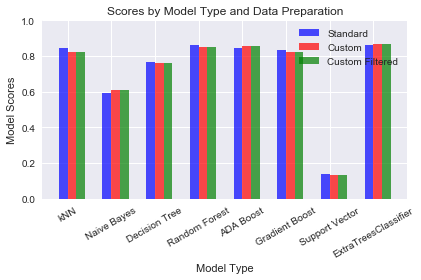

In [49]:
# Summary Bar Plot
group_names = ('kNN', 'Naive Bayes','Decision Tree','Random Forest','ADA Boost',
               'Gradient Boost', 'Support Vector', 'ExtraTreesClassifier') #  Model Families
n_groups = len(group_names)


standard_df_scores = (kNN_model_score, NB_model_score, DT_model_score, RF_model_score,
                     AB_model_score, GB_model_score, SVM_model_score, XRF_model_score)
filtered_df_scores = (kNN_model_score_custom, NB_model_score_custom, DT_model_score_custom, RF_model_score_custom,
                   AB_model_score_custom, GB_model_score_custom, SVM_model_score_custom, XRF_model_score_custom)
custom_filtered_df_scores = (kNN_model_score_custom_filt, NB_model_score_custom_filt, DT_model_score_custom_filt, RF_model_score_custom_filt,
                            AB_model_score_custom_filt, GB_model_score_custom_filt, SVM_model_score_custom_filt, XRF_model_score_custom_filt)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.20

opacity = 0.7

rects1 = plt.bar(index, standard_df_scores, bar_width,
                  alpha=opacity, color='b', label='Standard')

rects2 = plt.bar(index + bar_width, filtered_df_scores, bar_width,
                  alpha=opacity, color='r', label='Custom')

rects3 = plt.bar(index + bar_width*2, filtered_df_scores, bar_width,
                  alpha=opacity, color='g', label='Custom Filtered')

plt.xlabel('Model Type')
plt.ylabel('Model Scores')
plt.title('Scores by Model Type and Data Preparation')
plt.xticks(index + bar_width / 2, group_names, rotation = 30)
plt.ylim(0,1)
plt.legend()

plt.tight_layout()
plt.show()


In [50]:
result_df = pd.DataFrame(
    {
    'kNN': [kNN_model_score, kNN_model_score_custom, kNN_model_score_custom_filt],
    'NaiveBayes': [NB_model_score, NB_model_score_custom, NB_model_score_custom_filt],
    'DecisionTree': [DT_model_score, DT_model_score_custom, DT_model_score_custom_filt],
    'RandomForest': [RF_model_score, RF_model_score_custom, RF_model_score_custom_filt],
    'AdaBoost-RF': [AB_model_score, AB_model_score_custom, AB_model_score_custom_filt],
    'GradientBoost': [GB_model_score, GB_model_score_custom, GB_model_score_custom_filt],
    'SupportVectorClassification': [SVM_model_score, SVM_model_score_custom, SVM_model_score_custom_filt],
    'ExtraTreesClassifier': [XRF_model_score, XRF_model_score_custom, XRF_model_score_custom_filt],
    'data': ['Raw', 'Raw_with_engineered', 'Engineered_with_Hillshade']    
    }
)
result_df = result_df.set_index('data')
result_df[['kNN', 'NaiveBayes', 'DecisionTree', 'RandomForest', 'AdaBoost-RF', 
           'GradientBoost', 'SupportVectorClassification', 'ExtraTreesClassifier']]


kNN  NaiveBayes  DecisionTree  RandomForest  AdaBoost-RF  GradientBoost  SupportVectorClassification  ExtraTreesClassifier
data                                                                                                                                                      
Raw                        0.847884    0.592857      0.765344      0.863757     0.844974       0.834921                     0.138360              0.862963
Raw_with_engineered        0.825132    0.608995      0.763757      0.853439     0.856614       0.824603                     0.135450              0.867196
Engineered_with_Hillshade  0.801852    0.590476      0.768783      0.857937     0.855820       0.819048                     0.135185              0.871429

In [52]:
XRF_df_param_custom_filt

criterion  n_estimators  mean_test_score
0   entropy           300         0.859612
4   entropy           800         0.859171
2   entropy           600         0.858025
1   entropy           500         0.857584
3   entropy           700         0.857584

In [53]:
RF_df_param

criterion  n_estimators  mean_test_score
1   entropy           500         0.856878
4   entropy           800         0.856173
0   entropy           300         0.855732
3   entropy           700         0.855556
2   entropy           600         0.855379

In [88]:
itr = 0
while itr < len(test_df):
    if test_df.loc[itr, 'Hillshade_3pm'] == 0:
        test_df.loc[itr, 'Hillshade_3pm'] = model_best_3pm.predict(test_df.loc[itr, ['Elevation', 'Aspect', 'Slope', 
                        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 
                       'Horizontal_Distance_To_Fire_Points']].values.reshape(1,9))
        
    itr += 1

In [92]:
print test_df.shape
print train_df.shape
test_df1 = test_df

(565892, 53)
(15120, 52)


In [128]:
# test_df = test_df.drop('Id',1)
print test_df.shape
print len(final_rf_pred)

(565892, 52)
565892


In [133]:
final_rf = RandomForestClassifier(n_estimators = 300)
final_rf.fit(train_df, target)
final_rf_pred = final_rf.predict(test_df)
print final_rf.feature_importances_
print len(final_rf_pred)

[  2.29574041e-01   4.87832632e-02   3.58486070e-02   6.12830108e-02
   5.35793106e-02   9.34681090e-02   5.04127448e-02   4.43053793e-02
   4.62373634e-02   7.37969668e-02   1.82787946e-02   3.84907460e-03
   1.71152096e-02   4.35279542e-02   1.77467564e-03   6.31971065e-03
   1.88793880e-02   1.26424895e-02   1.21713625e-03   3.04426091e-03
   4.65270226e-06   1.03699448e-04   2.29019113e-02   3.24522950e-03
   4.37818358e-03   5.70663313e-03   7.07515505e-04   1.07173005e-03
   5.94549186e-03   9.15961588e-04   3.29941661e-04   1.58180122e-03
   2.30700831e-04   5.75527024e-03   5.25211961e-03   2.51133823e-03
   1.69952940e-05   4.37772454e-04   2.00598701e-04   1.23796761e-04
   5.22864329e-03   7.97778527e-03   2.42568284e-03   4.87263530e-03
   3.60747301e-03   3.01173978e-04   2.22288493e-03   9.66715816e-05
   6.17804548e-04   1.96117606e-02   1.77555824e-02   9.92306886e-03]
565892


In [134]:
d = {'Features': test_df.columns.values, 
                             'Importance': final_rf.feature_importances_}
final_rf_feats_importance = pd.DataFrame(data=d)
final_rf_feats_importance.head()


Features  Importance
0                         Elevation    0.229574
1                            Aspect    0.048783
2                             Slope    0.035849
3  Horizontal_Distance_To_Hydrology    0.061283
4    Vertical_Distance_To_Hydrology    0.053579

In [142]:
print custom_transformation_test_filtered.shape
print custom_transformation_train_filtered.shape

(565892, 17)
(15120, 17)


In [143]:
final_xrf = ExtraTreesClassifier(n_estimators = 500)
final_xrf.fit(custom_transformation_train_filtered, target)
final_xrf_pred = final_xrf.predict(custom_transformation_test_filtered)
print final_xrf.feature_importances_


[ 0.03749548  0.03425847  0.00853566  0.07226617  0.22174273  0.12170238
  0.05779848  0.04893215  0.0438653   0.04233363  0.0523251   0.0552359
  0.04427837  0.04424499  0.0441004   0.03627348  0.03461131]


In [144]:
d = {'Features': custom_transformation_test_filtered.columns.values, 'Importance':final_xrf.feature_importances_}
final_xrf_feats_importance = pd.DataFrame(data=d)
final_rf_feats_importance.head()

Features  Importance
0                         Elevation    0.229574
1                            Aspect    0.048783
2                             Slope    0.035849
3  Horizontal_Distance_To_Hydrology    0.061283
4    Vertical_Distance_To_Hydrology    0.053579

In [145]:
demean_train_cus_filt = custom_transformation_train[:]
demean_train_cus_filt = (demean_train_cus_filt - demean_train_cus_filt.mean())/demean_train_cus_filt.std()
X_train_demean_filt, X_dev_demean_filt, y_train_demean_filt, y_dev_demean_filt = train_test_split(demean_train_cus_filt, target)

final_check_xrf = ExtraTreesClassifier(n_estimators = 500)
final_check_xrf.fit(X_train_demean_filt, y_train_demean_filt)
print final_check_xrf.score(X_dev_demean_filt, y_dev_demean_filt)


0.880423280423


In [121]:
print final_check_xrf.feature_importances_

[ 0.13936088  0.02841749  0.02285218  0.03571493  0.02724902  0.04004462
  0.02997984  0.0249723   0.02437568  0.03434917  0.02688247  0.02596167
  0.00599029  0.0367019   0.13848033  0.0825056   0.04107855  0.0343843
  0.03030932  0.03018771  0.03787299  0.03835893  0.03166408  0.03230576]


In [148]:
demean_test_cus_filt = custom_transformation_test[:]

final_check_xrf_submit = ExtraTreesClassifier(n_estimators = 500)
final_check_xrf_submit.fit(demean_train_cus_filt, target)
final_check_xrf_pred = final_check_xrf_submit.predict(demean_test_cus_filt)
print len(final_check_xrf_pred)
print np.unique(final_check_xrf_pred)

565892
[1 7]


## Export Model Predictions on Test Set

In [140]:
# Choose Model to Run
# final_rf_pred
submission_df = pd.DataFrame(data= {'Id': test_df1['Id'], 'Cover_Type': final_rf_pred})
submission_df.to_csv(file_path + '/submission_final_rf.csv', index = False)

print np.unique(final_rf_pred)


[1 2 3 4 5 6 7]


In [146]:
len(test_df1['Id'])
len(final_xrf_pred)
print np.unique(final_xrf_pred)

[1 2 3 4 5 6 7]


In [147]:
# final_rf_pred
submission_df = pd.DataFrame(data= {'Id': test_df1['Id'], 'Cover_Type': final_xrf_pred})
submission_df.to_csv(file_path + '/submission_final_xrf_pred.csv', index = False)


In [137]:
# final_check_xrf_pred
submission_df = pd.DataFrame(data= {'Id': test_df1['Id'], 'Cover_Type': final_check_xrf_pred})
submission_df.to_csv(file_path + '/submission_final_check_xrf_pred.csv', index = False)


In [138]:
np.unique(final_check_xrf_pred)

array([1, 7])

In [160]:
final_kNN = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
final_RF = RandomForestClassifier(n_estimators = 500)
final_AB = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=600)
final_GB = GradientBoostingClassifier(n_estimators = 600)
final_XRF = ExtraTreesClassifier(n_estimators =700)

final_kNN.fit(train_df, target)
final_RF.fit(train_df, target)
final_AB.fit(custom_transformation_train_filtered, target)
final_GB.fit(train_df, target)
final_XRF.fit(custom_transformation_train_filtered, target)

final_kNN_pred = final_kNN.predict(test_df)
final_RF_pred = final_RF.predict(test_df)
final_AB_pred = final_AB.predict(custom_transformation_test_filtered)
final_GB_pred = final_GB.predict(test_df)
final_XRF_pred = final_XRF.predict(custom_transformation_test_filtered)

ensemble_preds = np.column_stack((final_kNN_pred, final_RF_pred, final_AB_pred, final_GB_pred, final_XRF_pred))
ensemble_count = np.apply_along_axis(np.bincount, 1, ensemble_preds, minlength=5)
final_ensemble_pred = np.argmax(ensemble_count, axis=1)

ValueError: could not broadcast input array from shape (5) into shape (6)

## PCA Aanlysis

In [ ]:
def best_components(n_features, X_train_data, y_train_data, X_dev_data, y_dev_dat):
    pca = PCA(n_components=n_features)
    X_transformed = pca.fit_transform(X_train_data)
    lr = LinearRegression()
    lr.fit(X_transformed, y_train_data)
    return lr.score(pca.transform(X_dev_data), y_dev_dat)

In [ ]:
def pca_analysis_reduction(train_data, test_data):
    pca = PCA()
    pca.fit(train_data)

    # Choose number of Compenents to Keep
    num_comp = np.sum(np.cumsum(pca.explained_variance_ratio_) < var_explained)
    print "Keep Number of Compenents: %i, explaining %0.2f%% Variance" %(num_comp, var_explained)

    # plot 
    plt.plot(pca.explained_variance_ratio_) 
    plt.title("PCA Explained Variance Ratio")
    plt.xlabel("Number of Fatures")
    plt.ylabel("Variance Ratio")
    plt.show()

    # Reduce Dataset 
    pca = PCA(n_components=num_comp).fit(train_data)
    X_train_pca = PCA(n_components=num_comp).fit_transform(train_data)
    X_dev_pca = pca.transform(test_data)
    print "Reduced Train set shape: %i X %i" % (X_train_pca.shape[0],X_train_pca.shape[1])
    return (X_train_pca, X_dev_pca)

In [ ]:
# Creat PCA datasets for training
var_explained = 0.95

# Standard Train Data 
out = [best_components(i, X_train, y_train, X_dev, y_dev) for i in range(1, X_train.shape[1])]
plt.plot(out)
plt.title("Standard Training Data")
plt.show()

# Filtered Train Data
out = [best_components(i, X_train_filtered, y_train_filtered, X_dev_filtered, y_dev_filtered) for i in range(1, X_train_filtered.shape[1])]
plt.plot(out)
plt.title("Filtered Training Data")
plt.show()

In [ ]:
# Preform PCA on regular data and on
(X_train_pca, X_dev_pca) = pca_analysis_reduction(X_train, X_dev)
(X_train_filtered_pca, X_dev_filtered_pca) = pca_analysis_reduction(X_train_filtered, X_dev_filtered)
print X_train_pca.shape, X_dev_pca.shape
print X_train_filtered_pca.shape, X_dev_filtered_pca.shape

In [ ]:
# estimator.get_params().keys()
def model_optimize(model, X_train, y_train, X_test, y_test, param_dict, return_model = False):
    
    df_param = pd.DataFrame()
    
    if len(param_dict) > 0:
        param_searcher = GridSearchCV(model(), param_dict, cv=5)
        param_searcher.fit(X_train, y_train)

        df_param = pd.DataFrame(list(param_searcher.cv_results_['params']))
        df_param['mean_test_score'] = param_searcher.cv_results_['mean_test_score']
        df_param = df_param.sort_values('mean_test_score', ascending=False)
        df_param = df_param.loc[:, ~df_param.columns.str.contains('index')]

        model_best = model(**param_searcher.best_params_)
    else:
        model_best = model()
        
        
    model_best.fit(X_train, y_train)
    model_score = model_best.score(X_test, y_test)
    pred = model_best.predict(X_test)
    
    df_confusion = pd.DataFrame(confusion_matrix(y_test, pred), 
                                columns=['Predicted=1', 'Predicted=2', 'Predicted=3', 'Predicted=4', 'Predicted=5', 'Predicted=6', 'Predicted=7'], 
                                index=['Actual=1', 'Actual=2', 'Actual=3', 'Actual=4', 'Actual=5', 'Actual=6', 'Actual=7']
    )
     
    if return_model == False: 
        return model_score, df_param, df_confusion
    else: 
        return model_score, df_param, df_confusion, model_best